# **Predicting Customer Churn in a Telecom Company**

# 1. **Problem statement**

A telecom company is facing a high customer churn rate and wants to reduce it. Customer churn refers to the process where a customer stops doing business with a company. In the telecom industry, customer churn is a major problem as acquiring new customers is more expensive than retaining existing customers. The company wants to use machine learning to predict which customers are likely to churn so that they can take proactive measures to retain them.

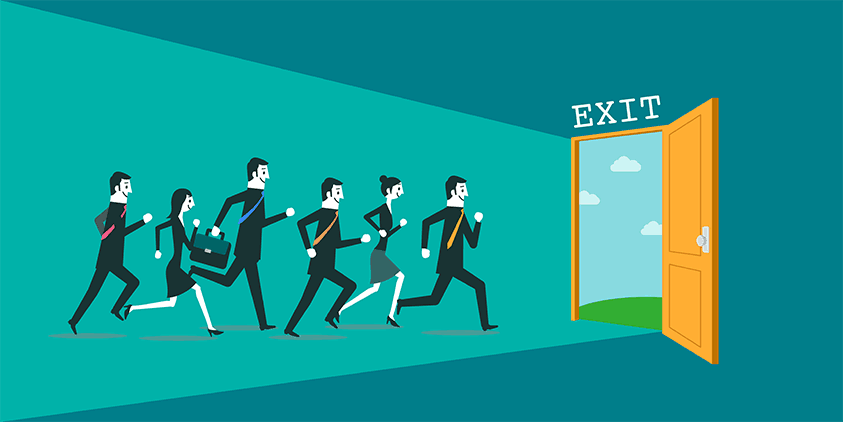

#**2. Import necessary libraries and load the dataset**

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('/content/train.csv')


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


**Observation**

**So, In this Telecom Company's Data we have,**

* Churn Column - Customers who left recently

* Services provided by the company to its customer – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* Customer's Information Columns - Old/New Customer and their Active Period, contract, payment method, paperless billing, monthly charges, and total charges

* Customer's Demographic Columns – gender, age range, and if they have partners and dependents

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# shape of the dataset
df.shape

(7043, 21)

In [7]:
# columns in a dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# Checking the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# Check the descriptive statistics of numeric variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Observation**

* SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

* 75% customers have tenure less than 55 months

* Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

# 3. **Data cleaning**

In [10]:
# Convert TotalCharges column to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
#checking null values in a dataset
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Text(0.5, 1.0, 'Percentage of Missing values')

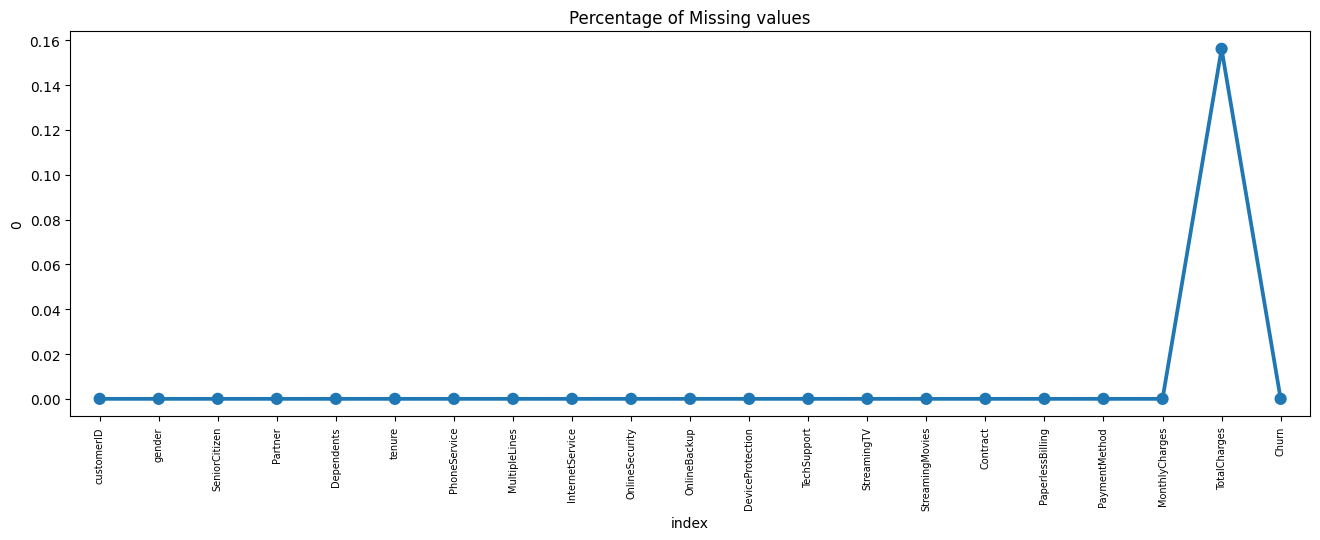

In [12]:
#ploting misssing values 
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")

In [13]:
# Replace missing values with mean value
df.fillna(df.mean(), inplace=True)

<ipython-input-13-972e68d8271f>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [14]:
#checking null values in a dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
#Removing tenure equal to 0
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

In [16]:
df.shape

(7032, 21)

**observation:**

* from this we can observe that there are 11 rows removed because of tenure is 0

In [17]:
#Categorizing Senior Citizen column for encoding
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
#Finding any absurd values in Numeric Columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [19]:
#Creating Dataframe for correlation plot
df2 = df
df2=df2.drop('customerID',axis=1)
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)
df_dummies = pd.get_dummies(df2)

df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


<Axes: >

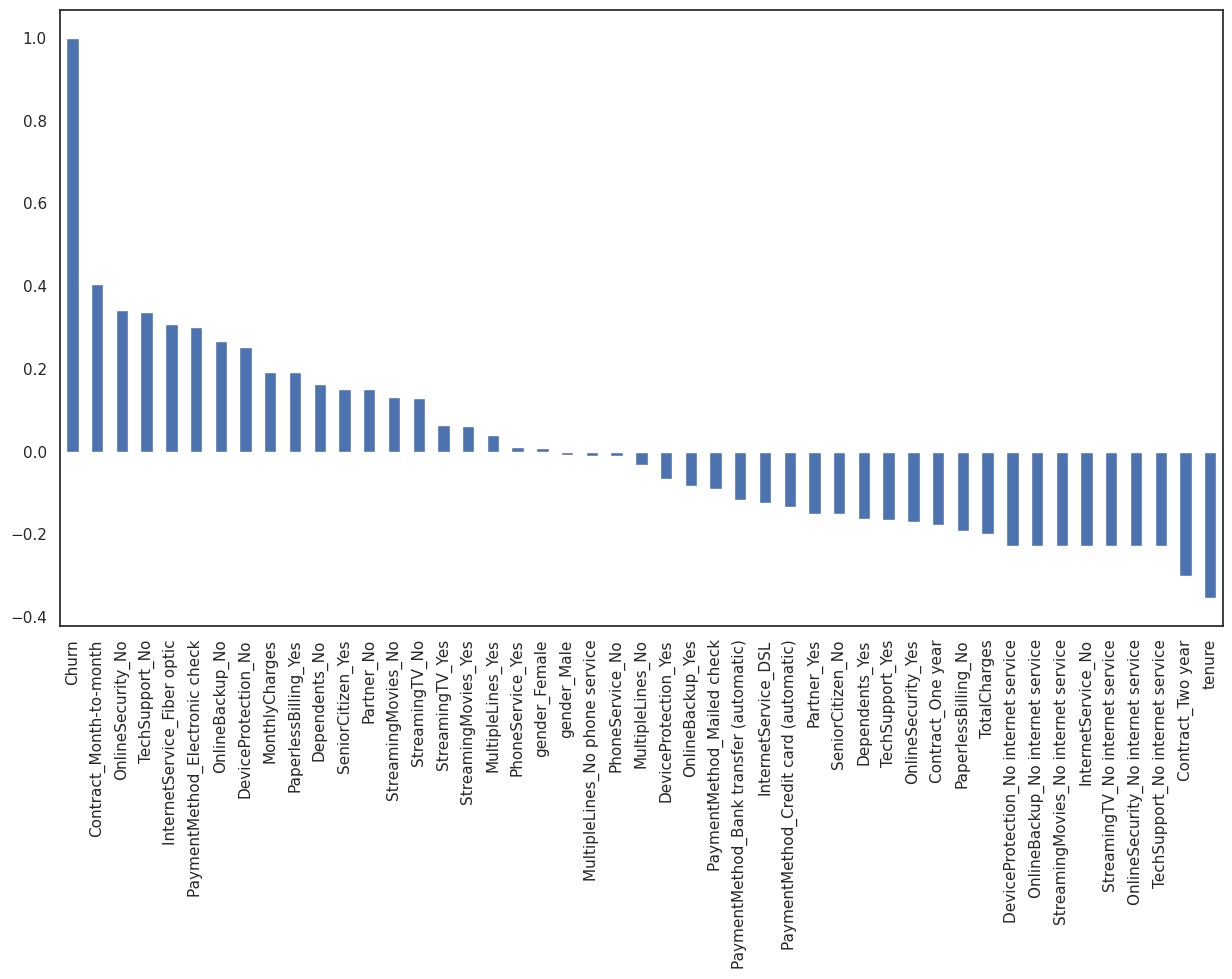

In [20]:
#Correlation of "Churn" with Features:
plt.figure(figsize=(15,8))
sns.set(style = 'white')

df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Observation**

* HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

* LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

* Factors like Gender, Availability of PhoneService and  multiple lines have alomost NO impact on Churn

* Features with a high positive correlation are likely to be associated with a higher risk of churn, while features with a high negative correlation are likely to be associated with a lower risk of churn.

In [21]:
# Identifying the unique number of values in the dataset
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

# **4. Visualizing The Data**



In [22]:
#checking value count of dependent variable
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

**Observation**

* Data is highly imbalanced, ratio = 73:27<br>


* **Gender Spread and Churn Distribution**

In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
gender_labels = ['Male', 'Female']
churn_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=gender_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=churn_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.55, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.83, y=0.5, font_size=20, showarrow=False)])
fig.data[0].marker.colors = ('#7fcdff','#326ada')
fig.data[1].marker.colors = ('#56c175','#ff9b35')


fig.show()

**Observation**

* Customers switched from current firm to another firm are 26.6 %.

* Gender Demography among customers are 49.5 % female and 50.5 % male.

* **Churn Distribution w.r.t Gender**

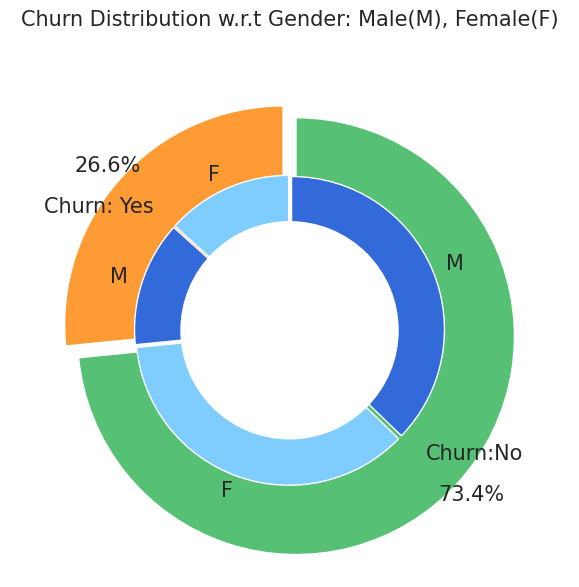

In [24]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff9b35', '#56c175']
colors_gender = ['#7fcdff','#326ada', '#7fcdff','#326ada']
explode = (0.4,0.4) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

**Observation**

* There's almost to null differences between the people who churned, as both men and women are churn in equal ratio.

**Contract Distribution w.r.t Churn**

In [25]:
import plotly.express as px
color_discrete_map = {"Month-to-month": "#7fcdff", "One year": "#326ada", "Two year": "#ff9b35"}

fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Churn Distribution w.r.t Contract<b>", color_discrete_map = color_discrete_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Observation**

* 75% of customer who have Month-to-Month Contract have opted to move out as compared to 13% of customers who have signed One Year Contract and 3% of customers who have signed Two Year Contract.

**Churn Distribution w.r.t Payment Method**

In [26]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Churn distribution w.r.t. Customer Payment Method</b>",text_auto=True)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.data[0].marker.color = ('#7fcdff')
fig.data[1].marker.color = ('#326ada')
fig.data[2].marker.color = ('#ff9b35')
fig.data[3].marker.color = ('#56c175')


fig.show()

**Observation**

* Majority of the customers who moved out were having Electronic Check as Payment Method and others who opted for Credit-Card automatic transfer / Bank Automatic Transfer and Mailed Check as Payment Method were less likely to switch.

**Churn Distribution w.r.t Internet Services and Gender**

In [27]:
fig = go.Figure()

colors = {'Female':'steelblue','Male':'firebrick'}

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL'))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))


fig.update_layout(title_text="<b>Churn Distribution w.r.t Internet Service and Gender</b>")
fig.data[0].marker.color = ('#7fcdff','#7fcdff','#7fcdff','#7fcdff')
fig.data[1].marker.color = ('#326ada','#326ada','#326ada','#326ada')
fig.data[2].marker.color = ('#ff9b35','#ff9b35','#ff9b35','#ff9b35')


fig.show()

**Observation**

* Fiber optic service which was choosen by a lot of customers and it's evident that there's high churn rate among these customers. This could expose an issue in the Fiber optic service which dissatisfied most of it's customers

* Customers who opted for DSL service are larger in number and is found to have less churn rate compared to Fibre optic service

**Churn Distribution w.r.t Dependants**

In [28]:
color_map = {"Yes": "#7fcdff", "No": "#326ada"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Churn distribution w.r.t. Dependents</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Observation**

* Customers without dependents are more likely to churn

**Churn Distribution w.r.t Partners**

In [29]:
color_map = {"Yes": '#7fcdff', "No": '#326ada'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Churn distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Observation**

* On the above visual, a conclusion can be obtained such that customers without dependents and customers who have partners are more likely to churn while senior citizens being the most of churn.

**Churn Distribution w.r.t Senior Citizens**

In [30]:
color_map = {"Yes": '#7fcdff', "No": '#326ada'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Churn distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Observation**

* Eventhough the observed fraction of senior citizen is very less, most of the senior citizens churn.

**Churn Distribution w.r.t Online Security**

In [31]:
color_map = {"Yes": "#7fcdff", "No": "#326ada", "No internet service":"#ff9b35"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Observation**

* Absence of online security,makes most customers churn.

**Churn Distribution w.r.t Paperless Billing**

In [32]:
color_map = {"Yes": '#7fcdff', "No": '#326ada'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Churn distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Observation**

* Paperless Billing seems like one the reasons because of which customers are most likely to churn.

**Churn Distribution w.r.t Tech Support**

In [33]:
color_map = {"Yes": "#7fcdff", "No": "#326ada", "No internet service":"#ff9b35"}


fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Churn distribution w.r.t. TechSupport</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Observation**

* The absence of online security, Paperless Billing system and services with no TechSupport were the similiar trend are of the customers who are most likely churn.

**Churn Distribution w.r.t Phone Service**

In [34]:
color_map = {"Yes": '#7fcdff', "No": '#326ada'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Churn distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Observation**

* Eventhough there's a small fraction of customers but it's better to point out as they are more likely to churn because don't have a phone service.

In [35]:
# Distribution of the numerical variables
fig = px.histogram(df, x='tenure', nbins=50, opacity=0.7, color='Churn',
                   marginal='box', barmode='overlay')
fig.update_layout(title='Distribution of Tenure')
fig.show()

fig = px.histogram(df, x='MonthlyCharges', nbins=50, opacity=0.7, color='Churn',
                   marginal='box', barmode='overlay')
fig.update_layout(title='Distribution of Monthly Charges')
fig.show()

fig = px.histogram(df, x='TotalCharges', nbins=50, opacity=0.7, color='Churn',
                   marginal='box', barmode='overlay')
fig.update_layout(title='Distribution of Total Charges')
fig.show()

**Observation**

* High Monthly Charges are also one of a reason which makes Customers more likely to churn 

* High Total Charges are also one of a reason which makes Customers more likely to churn,there might be an issue with pricing system which needs to addressed

* However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

**Relationship between the numerical variables**

In [36]:
# Relationship between the numerical variables
fig = px.scatter(df, x='tenure', y='MonthlyCharges', color='Churn',
                 hover_data=['gender', 'SeniorCitizen'], opacity=0.7)
fig.update_layout(title='Relationship between Tenure and Monthly Charges')
fig.show()

fig = px.scatter(df, x='tenure', y='TotalCharges', color='Churn',
                 hover_data=['gender', 'SeniorCitizen'], opacity=0.7)
fig.update_layout(title='Relationship between Tenure and Total Charges')
fig.show()

fig = px.scatter(df, x='MonthlyCharges', y='TotalCharges', color='Churn',
                 hover_data=['gender', 'SeniorCitizen'], opacity=0.7)
fig.update_layout(title='Relationship between Monthly Charges and Total Charges')
fig.show()

**Observation**

Total Charges increase as Monthly Charges increase - as expected.

* ***Corelation between the features***

In [37]:
import plotly.graph_objects as go
# Heatmap of the correlation matrix
corr = df.corr()
fig = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.index.values,
    y=corr.columns.values,
    colorscale='Viridis',
    reversescale=True))
fig.update_layout(title='Correlation Matrix')
fig.show()

Observation:

* **Positive corelation**

  Toatal charges and tennure(0.82%)

  Total charges and Monthly Charges(0.65%)




#**5. Data Pre-Processing**

In [38]:
#droping customerID column from dataset
df=df.drop('customerID',axis=1)

In [39]:
# defining numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['tenure', 'MonthlyCharges', 'TotalCharges']

We have 17 categorical features : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


***encoding the features***

In [40]:
df['Churn'] = np.where(df.Churn == 'Yes',1,0)

In [41]:
# Import label encoder 
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

df['gender']= label_encoder.fit_transform(df['gender'])
df['Partner']= label_encoder.fit_transform(df['Partner'])
df['SeniorCitizen']= label_encoder.fit_transform(df['SeniorCitizen'])
df['Dependents']= label_encoder.fit_transform(df['Dependents'])
df['PhoneService']= label_encoder.fit_transform(df['PhoneService'])

df['MultipleLines']= label_encoder.fit_transform(df['MultipleLines'])
df['InternetService']= label_encoder.fit_transform(df['InternetService'])
df['OnlineSecurity']= label_encoder.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']= label_encoder.fit_transform(df['OnlineBackup'])
df['DeviceProtection']= label_encoder.fit_transform(df['DeviceProtection'])
df['TechSupport']= label_encoder.fit_transform(df['TechSupport'])

df['StreamingTV']= label_encoder.fit_transform(df['StreamingTV'])
df['StreamingMovies']= label_encoder.fit_transform(df['StreamingMovies'])
df['Contract']= label_encoder.fit_transform(df['Contract'])
df['PaperlessBilling']= label_encoder.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']= label_encoder.fit_transform(df['PaymentMethod'])



***Outlier treatment***

In [42]:
# Identify the columns with potential outliers
outlier_cols = ['tenure', 'MonthlyCharges','TotalCharges']

# Replace outliers with the upper and lower bounds
for col in outlier_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

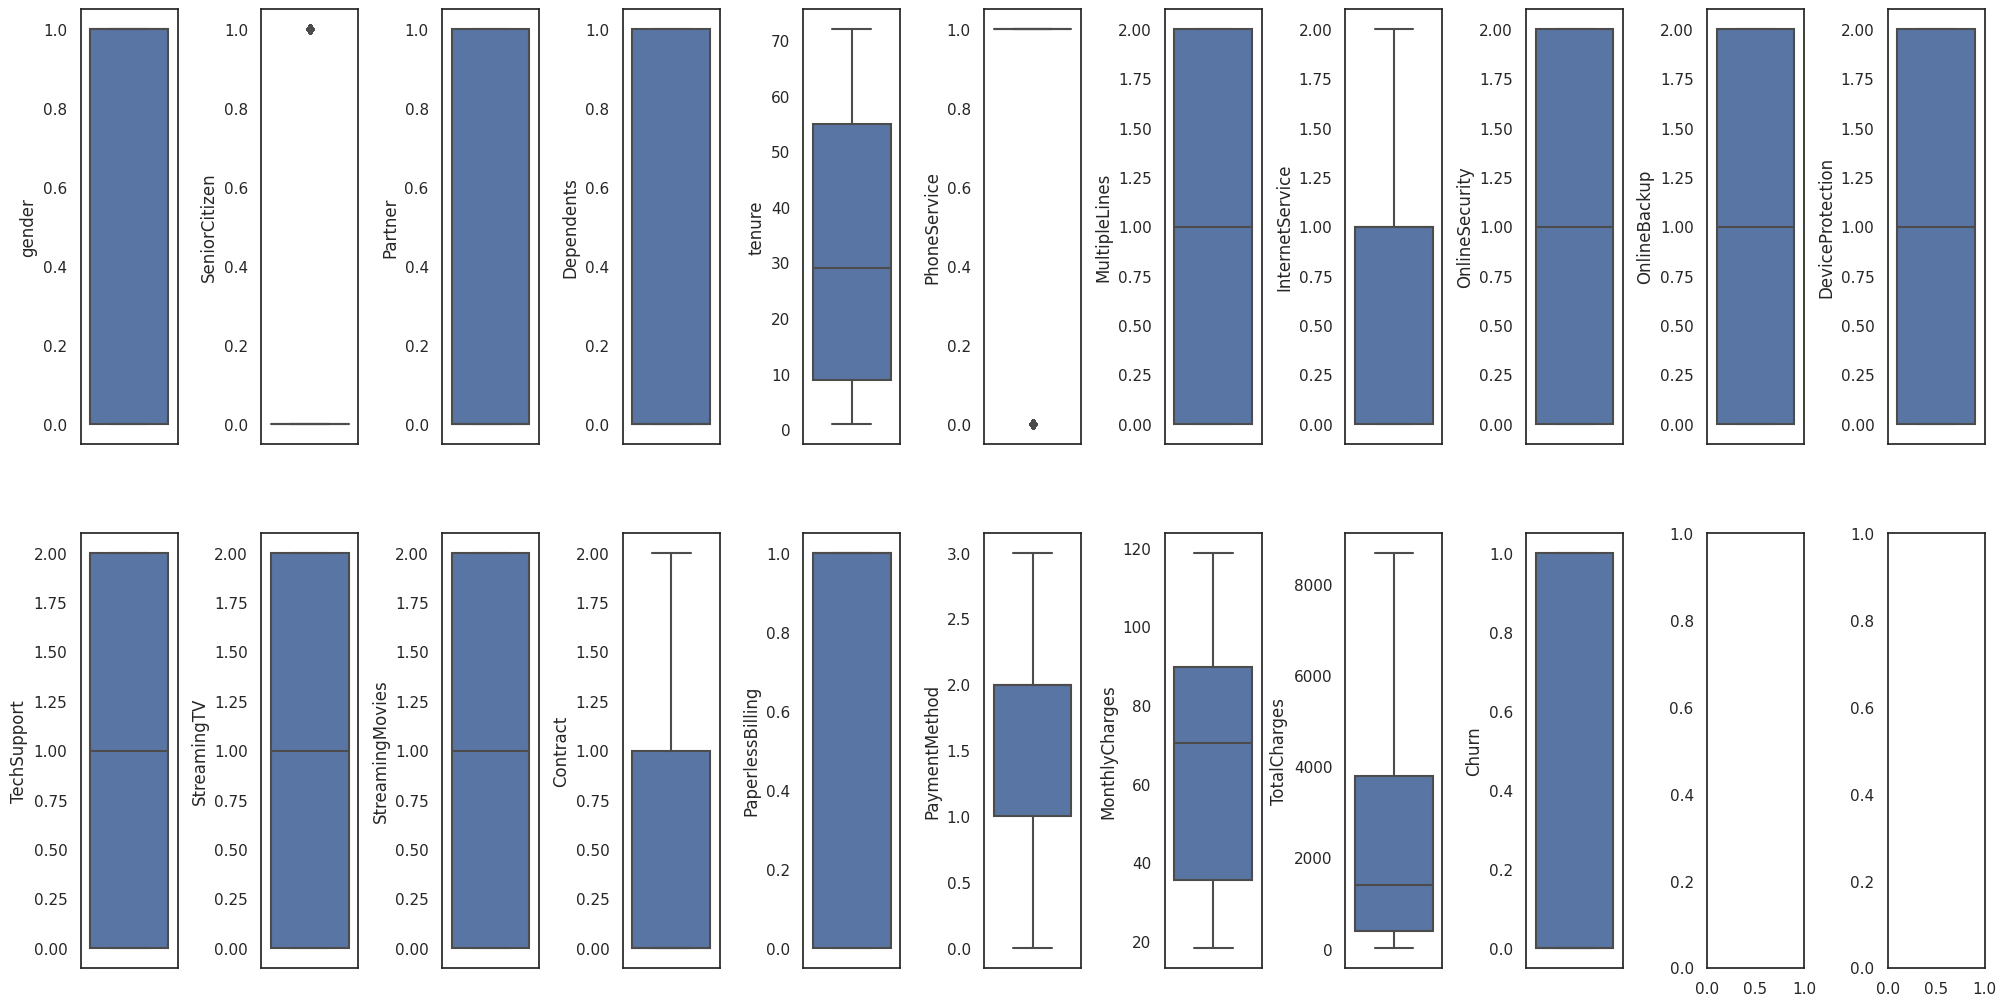

In [43]:
#checking outiliers in dataset
fig, axs = plt.subplots(ncols=11, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data= df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

***stadardizing the Data***

In [44]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Scaling the numeric columns using StandardScaler
num_cols =['MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# 6.Data cleaning and preprocessing of Test data

In [45]:
#loading test dataset
df1=pd.read_csv('test.csv')

In [46]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,25,Yes,No,Fiber optic,Yes,no,yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,106.00,2787.00
1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,30.00,30.00
2,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
3,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
4,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


In [47]:
df1.shape

(20, 19)

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            20 non-null     object 
 1   SeniorCitizen     20 non-null     int64  
 2   Partner           20 non-null     object 
 3   Dependents        20 non-null     object 
 4   tenure            20 non-null     int64  
 5   PhoneService      20 non-null     object 
 6   MultipleLines     20 non-null     object 
 7   InternetService   20 non-null     object 
 8   OnlineSecurity    20 non-null     object 
 9   OnlineBackup      20 non-null     object 
 10  DeviceProtection  20 non-null     object 
 11  TechSupport       20 non-null     object 
 12  StreamingTV       20 non-null     object 
 13  StreamingMovies   20 non-null     object 
 14  Contract          20 non-null     object 
 15  PaperlessBilling  20 non-null     object 
 16  PaymentMethod     20 non-null     object 
 17 

In [49]:
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [50]:
# defining numerical & categorical columns
numeric_features = [feature for feature in df1.columns if df1[feature].dtype != 'O']
categorical_features = [feature for feature in df1.columns if df1[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

We have 15 categorical features : ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


***encoding the features***

In [51]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

df1['gender']= label_encoder.fit_transform(df1['gender'])
df1['Partner']= label_encoder.fit_transform(df1['Partner'])
df1['SeniorCitizen']= label_encoder.fit_transform(df1['SeniorCitizen'])
df1['Dependents']= label_encoder.fit_transform(df1['Dependents'])
df1['PhoneService']= label_encoder.fit_transform(df1['PhoneService'])

df1['MultipleLines']= label_encoder.fit_transform(df1['MultipleLines'])
df1['InternetService']= label_encoder.fit_transform(df1['InternetService'])
df1['OnlineSecurity']= label_encoder.fit_transform(df1['OnlineSecurity'])
df1['OnlineBackup']= label_encoder.fit_transform(df1['OnlineBackup'])
df1['DeviceProtection']= label_encoder.fit_transform(df1['DeviceProtection'])
df1['TechSupport']= label_encoder.fit_transform(df1['TechSupport'])

df1['StreamingTV']= label_encoder.fit_transform(df1['StreamingTV'])
df1['StreamingMovies']= label_encoder.fit_transform(df1['StreamingMovies'])
df1['Contract']= label_encoder.fit_transform(df1['Contract'])
df1['PaperlessBilling']= label_encoder.fit_transform(df1['PaperlessBilling'])
df1['PaymentMethod']= label_encoder.fit_transform(df1['PaymentMethod'])



***stadardizing the Data***

In [52]:

# Scaling the numeric columns using StandardScaler
num_cols =['MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df1[num_cols] = scaler.fit_transform(df1[num_cols])

# **6. Model Building**

In [53]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [54]:

x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,-1.161694,-0.994194
1,1,0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,-0.260878,-0.173740
2,1,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,-0.363923,-0.959649
3,1,0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,-0.747850,-0.195248
4,0,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24.0,1,2,0,2,0,2,2,2,2,1,1,3,0.664868,-0.129180
7039,0,0,1,1,72.0,1,2,1,0,2,2,0,2,2,1,1,1,1.276493,2.241056
7040,0,0,1,1,11.0,0,1,0,2,0,0,0,0,0,0,1,2,-1.170004,-0.854514
7041,1,1,1,0,4.0,1,2,1,0,0,0,0,0,0,0,1,3,0.319168,-0.872095


In [55]:

y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

***Train and test split***

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# logistic regression model

In [58]:
# Building and training the logistic regression model
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)
# Evaluating the logistic regression model
y_pred_lr = lr.predict(x_test)
print("Accuracy of logistic regression model:", accuracy_score(y_test, y_pred_lr))
print("Confusion matrix of logistic regression model:\n", confusion_matrix(y_test, y_pred_lr))
print("classification_report of logistic regression model:\n",classification_report(y_test, y_pred_lr, labels=[0,1]))
f1 = f1_score(y_test, y_pred_lr)
print("F1 score:", f1)

Accuracy of logistic regression model: 0.7860696517412935
Confusion matrix of logistic regression model:
 [[921 112]
 [189 185]]
classification_report of logistic regression model:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.77      0.79      0.78      1407

F1 score: 0.5514157973174367


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# **Decision tree model**

In [59]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [60]:
# Evaluating the logistic regression model
y_pred_dt=model_dt.predict(x_test)
print("Accuracy of DecisionTreeClassifier model:", accuracy_score(y_test, y_pred_lr))
print("Confusion matrix of DecisionTreeClassifier model:\n", confusion_matrix(y_test, y_pred_lr))
print("classification_report of DecisionTreeClassifier model:\n",classification_report(y_test, y_pred_lr, labels=[0,1]))
f1 = f1_score(y_test, y_pred_lr)
print("F1 score:", f1)

Accuracy of DecisionTreeClassifier model: 0.7860696517412935
Confusion matrix of DecisionTreeClassifier model:
 [[921 112]
 [189 185]]
classification_report of DecisionTreeClassifier model:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.77      0.79      0.78      1407

F1 score: 0.5514157973174367


# **Random forest model**

In [61]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [62]:
# Evaluating the random forest model
y_pred_rf = model_rf.predict(x_test)
print("Accuracy of random forest model:", accuracy_score(y_test, y_pred_rf))
print("Confusion matrix of random forest model:\n", confusion_matrix(y_test, y_pred_rf))
print("classification_report of random forest  model:\n",classification_report(y_test, y_pred_rf, labels=[0,1]))
f1 = f1_score(y_test, y_pred_rf)
print("F1 score:", f1)

Accuracy of random forest model: 0.7945984363894811
Confusion matrix of random forest model:
 [[951  82]
 [207 167]]
classification_report of random forest  model:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1033
           1       0.67      0.45      0.54       374

    accuracy                           0.79      1407
   macro avg       0.75      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407

F1 score: 0.5361155698234349


***Hyper Parameter Tuning(Grid search CV)***

In [63]:
#Hyperparameter Tuning for Random Forest
params_rf = {'n_estimators': [50,100,150], 'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10,20,15,], 'min_samples_leaf': [1, 2, 4,10], 'max_features': ['sqrt', 'log2']}
grid_rf = GridSearchCV(estimator=model_rf, param_grid=params_rf, cv=5)
grid_rf.fit(x_train, y_train)
y_pred_grid_rf = grid_rf.predict(x_test)
print('Random Forest Tuned Accuracy:', accuracy_score(y_test, y_pred_grid_rf))
print('Random Forest Best Parameters:', grid_rf.best_params_)

Random Forest Tuned Accuracy: 0.7981520966595593
Random Forest Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 150}


# XGBoost

In [64]:

# XGBoost
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
f1 = f1_score(y_test, y_pred_xgb)
print('XGBoost Accuracy:', accuracy_score(y_test, y_pred_xgb))
print("F1 score:", f1)

XGBoost Accuracy: 0.7697228144989339
F1 score: 0.5276967930029154


# Gradient Boosting

In [65]:
# Gradient Boosting Machine
gbm = GradientBoostingClassifier()
gbm.fit(x_train, y_train)
y_pred_gbm = gbm.predict(x_test)
print('Gradient Boosting Machine Accuracy:', accuracy_score(y_test, y_pred_gbm))
f1 = f1_score(y_test, y_pred_gbm)
print("F1 score:", f1)

Gradient Boosting Machine Accuracy: 0.7953091684434968
F1 score: 0.5609756097560976


***Oversampling To balence the data***

In [66]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

from imblearn.combine import SMOTEENN

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x, y)

print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_resampled.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_resampled==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled==0)))

Before OverSampling, counts of label '1': 1495
Before OverSampling, counts of label '0': 4130 

After OverSampling, the shape of train_X: (6713, 19)
After OverSampling, the shape of train_y: (6713,) 

After OverSampling, counts of label '1': 3967
After OverSampling, counts of label '0': 2746


In [67]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled, y_resampled,test_size=0.2,random_state=42)

# ***Random Forest Classifier model applying on balenced data***

In [68]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [69]:
model_rf_smote.score(xr_train1,yr_train1)

0.933147113594041

In [70]:
y_pred_rf_smote = model_rf_smote.predict(xr_test1)
print("Accuracy of random forest model:", accuracy_score(yr_test1, y_pred_rf_smote))
print("Confusion matrix of random forest model:\n", confusion_matrix(yr_test1, y_pred_rf_smote))
print("classification_report of random forest  model:\n",classification_report(yr_test1, y_pred_rf_smote, labels=[0,1]))
f1 = f1_score(yr_test1, y_pred_rf_smote)
print("F1 score:", f1)

Accuracy of random forest model: 0.9277736411020104
Confusion matrix of random forest model:
 [[501  68]
 [ 29 745]]
classification_report of random forest  model:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       569
           1       0.92      0.96      0.94       774

    accuracy                           0.93      1343
   macro avg       0.93      0.92      0.93      1343
weighted avg       0.93      0.93      0.93      1343

F1 score: 0.9388783868935099


# ***Gradient Boosting model applying on balenced data***

In [71]:
# Gradient Boosting Machine
gbm_smote = GradientBoostingClassifier()
gbm_smote.fit(xr_train1,yr_train1)
y_pred_gbm_smote = gbm_smote.predict(xr_test1)
print('Gradient Boosting Machine Accuracy:', accuracy_score(yr_test1, y_pred_gbm_smote))
f1 = f1_score(yr_test1, y_pred_gbm_smote)
print("F1 score:", f1)

Gradient Boosting Machine Accuracy: 0.9419210722263589
F1 score: 0.9505076142131978


# ***Downloding Pickle file***

In [72]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("model_rf_smote.pkl","wb")
pickle.dump(model_rf_smote, pickle_out)
pickle_out.close()

# ***Applying Test Data***

In [74]:
model_rf_smote.predict([[0,0.0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925.0]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([1])

In [75]:
y_pred = model_rf_smote.predict_proba([[0,0.0,0,0,11.802333,1,1,1,0,0,0,0,0,1,0,1,1,81.032399,674.301500]])[0, 1]
churn = y_pred >= 0.5
output_prob = float(y_pred)
output = bool(churn)
print(output_prob)
print(output)       

0.9323461147987661
True


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [76]:
y_pred = model_rf_smote.predict_proba(df1)[0, 1]
churn = y_pred >= 0.5
output_prob = float(y_pred)
output = bool(churn)
print(output_prob)
print(output)      

0.6346760435494189
True


# **REFERENCES**



In [ ]:
#https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
#https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#https://www.kaggle.com/

#-------------------------------------------------**END**-------------------------------------------------------